In [1]:
 !pip install transformers

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/5-class-bangla-news-comments/5 class Bangla News comments dataset.xlsx


In [5]:
df=pd.read_excel('/kaggle/input/5-class-bangla-news-comments/5 class Bangla News comments dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13802 entries, 0 to 13801
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13802 non-null  int64 
 1   Index       13802 non-null  int64 
 2   Text        13800 non-null  object
 3   Sentiment   13802 non-null  object
 4   Label       13802 non-null  int64 
 5   Token       13802 non-null  object
 6   Token_ID    13802 non-null  object
dtypes: int64(3), object(4)
memory usage: 754.9+ KB


In [6]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 42.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313832 sha256=ce2a00dfab02172eba038791fcea1b7f0bbbeaadad7fa2e5c469d4575b8f1989
  Stored in directory: /root/.cache/pip/wheels/cb/c2/1a/db7e1066fb4a94becc327ec359a493a8899089609d5569

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [8]:
import ktrain
from ktrain import text

In [9]:
#df_filtered = df[df['Label'] > 0]
#df=df_filtered

In [10]:
df.Label.value_counts(), len(df)

(3    3928
 0    3198
 1    2951
 4    2280
 2    1445
 Name: Label, dtype: int64,
 13802)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
encoded_labels = le.transform(df['Label'])
labels = np.array(encoded_labels) # Converting into numpy array
class_names =le.classes_
print(class_names)

def Label(label):
    if(label==1):
        return 'positive'
    elif(label==0):
        return 'neutral'
    elif(label==2):
        return 'negative'
df['Sentiment'] = df['Label'].apply(Label)
df.Sentiment.value_counts(), len(df)

In [11]:
df.Sentiment.value_counts(), len(df)

(Very Negative    3928
 Negative         3198
 Neutral          2951
 Very Positive    2280
 Positive         1445
 Name: Sentiment, dtype: int64,
 13802)

In [12]:
df.head()

,Unnamed: 0,Index,Text,Sentiment,Label,Token,Token_ID
0,4068,4068,প্রথম আলোর উচিত হা হা রিএক্ট চালু করা,Positive,2,"['পর', '##থম', 'আলে', '##ার', 'উচিত', 'হা', 'হ...","[2076, 25492, 24182, 3187, 2351, 7725, 7725, 6..."
1,10991,10991,শ্রীলংকার সাথে সাকিব যেদিন আম্পায়ারদের ভুল সি...,Positive,2,"['শর', '##ীল', '##ংকার', 'সাথে', 'সাকিব', 'যেদ...","[14033, 36600, 62021, 2179, 4798, 9012, 5027, ..."
2,1072,1072,যেকোনো ব্যবসা প্রতিষ্ঠান সরকারের হাতে থাকলেই চ...,Very Negative,3,"['যে', '##কে', '##ানে', '##া', 'ব', '##যব', '#...","[2060, 2071, 31044, 2395, 5740, 69734, 6240, 5..."
3,1040,1040,তম হয়ে পাস করেছি মিস্টি বিতরণ করা হোক,Very Positive,4,"['তম', 'হয', '##ে', 'পাস', 'করেছি', 'মিস', '##...","[2380, 33668, 2094, 3094, 3267, 3139, 2294, 55..."
4,8099,8099,কারখানা খুব লাভ করেছে এই অজুহাতে আবার বেতন বাড়...,Neutral,1,"['কারখানা', 'খ', '##ব', 'লাভ', 'করেছে', 'এই', ...","[4234, 5356, 4282, 2325, 2124, 2045, 28867, 29..."


In [13]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Token'].tolist()
y_train=train['Label'].tolist()
x_validation=validation['Token'].tolist()
y_validation=validation['Label'].tolist()
x_test=test['Token'].tolist()
y_test=test['Label'].tolist()

In [14]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [15]:
categories = [0,1,2,3,4]

In [16]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=200,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

In [17]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 33
	95percentile : 95
	99percentile : 140


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 32
	95percentile : 95
	99percentile : 135


In [18]:
model = trans.get_classifier()

In [19]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [20]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(5)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
920/920 [==============================] - 193s 185ms/step - loss: 1.5803 - accuracy: 0.2517
Epoch 2/10
920/920 [==============================] - 171s 186ms/step - loss: 1.5623 - accuracy: 0.2860
Epoch 3/10
920/920 [==============================] - 171s 186ms/step - loss: 1.5604 - accuracy: 0.2837
Epoch 4/10
920/920 [==============================] - 171s 186ms/step - loss: 1.5707 - accuracy: 0.2666
Epoch 5/10
920/920 [==============================] - 169s 184ms/step - loss: 1.6051 - accuracy: 0.2580
Epoch 7/10
920/920 [==============================] - 169s 184ms/step - loss: 6.3518 - accuracy: 0.2298
Epoch 8/10
920/920 [==============================] - 0s 229us/step - loss: 15.1281 - accuracy: 0.2083


done.
Visually inspect loss plot and select learning rate associated with falling loss


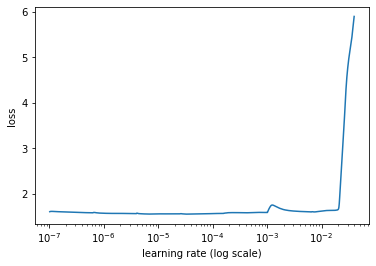

In [21]:
learner.lr_find(show_plot = True,max_epochs=10)

In [22]:
learner.fit_onecycle(5e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
921/921 [==============================] - 197s 196ms/step - loss: 1.6131 - accuracy: 0.2017 - val_loss: 1.6344 - val_accuracy: 0.1108
Epoch 2/10
921/921 [==============================] - 175s 190ms/step - loss: 1.6122 - accuracy: 0.1948 - val_loss: 1.6091 - val_accuracy: 0.2238
Epoch 3/10
921/921 [==============================] - 175s 190ms/step - loss: 1.6236 - accuracy: 0.1935 - val_loss: 1.6091 - val_accuracy: 0.2824
Epoch 4/10
921/921 [==============================] - 174s 189ms/step - loss: 1.6140 - accuracy: 0.1927 - val_loss: 1.6149 - val_accuracy: 0.2238
Epoch 5/10
921/921 [==============================] - 175s 190ms/step - loss: 1.6151 - accuracy: 0.1987 - val_loss: 1.6223 - val_accuracy: 0.1166
Epoch 6/10
921/921 [==============================] - 175s 190ms/step - loss: 1.6152 - accuracy: 0.1803 - val_loss: 1.5909 - val_accuracy: 0.2867
Epoch 7/10
921/921 [==============================] - 174s 18

In [23]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.26      0.04      0.07       310
           2       0.11      0.97      0.20       153
           3       0.00      0.00      0.00       390
           4       0.00      0.00      0.00       219

    accuracy                           0.12      1381
   macro avg       0.07      0.20      0.05      1381
weighted avg       0.07      0.12      0.04      1381



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,  16, 293,   0,   0],
       [  0,  12, 298,   0,   0],
       [  0,   4, 149,   0,   0],
       [  0,   6, 384,   0,   0],
       [  0,   9, 210,   0,   0]])

In [24]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [25]:
y_pred_mbert_uncased = predictor.predict(x_test)
#print(y_pred)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_uncased))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.44      0.05      0.09       316
           2       0.08      0.96      0.15       113
           3       0.00      0.00      0.00       374
           4       0.00      0.00      0.00       240

    accuracy                           0.09      1380
   macro avg       0.10      0.20      0.05      1380
weighted avg       0.11      0.09      0.03      1380



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


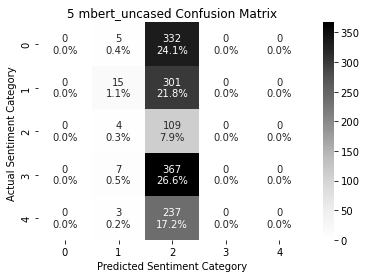

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_uncased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 mbert_uncased Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('5 mbert_uncased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [28]:
model_name = 'monsoon-nlp/bangla-electra'
trans = text.Transformer(model_name,maxlen=200,class_names=categories)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

In [29]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 33
	95percentile : 95
	99percentile : 140


Downloading:   0%|          | 0.00/161 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 32
	95percentile : 95
	99percentile : 135


In [30]:
model = trans.get_classifier()

In [31]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [32]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(5)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
920/920 [==============================] - 80s 65ms/step - loss: 1.6085 - accuracy: 0.2168
Epoch 2/10
920/920 [==============================] - 61s 66ms/step - loss: 1.5956 - accuracy: 0.2850
Epoch 3/10
920/920 [==============================] - 61s 67ms/step - loss: 1.5689 - accuracy: 0.2867
Epoch 4/10
920/920 [==============================] - 60s 66ms/step - loss: 1.5623 - accuracy: 0.2857
Epoch 5/10
920/920 [==============================] - 61s 67ms/step - loss: 1.5657 - accuracy: 0.2829
Epoch 6/10
920/920 [==============================] - 61s 66ms/step - loss: 1.5709 - accuracy: 0.2811
Epoch 7/10
920/920 [==============================] - 61s 66ms/step - loss: 1.5721 - accuracy: 0.2781
Epoch 8/10
920/920 [==============================] - 61s 66ms/step - loss: 1.5771 - accuracy: 0.2702
Epoch 9/10
920/920 [==============================] - 61s 66ms/step - loss: 1.6551 - accuracy: 0.2452

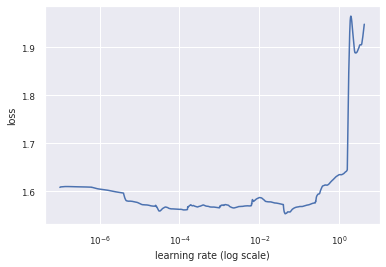

In [33]:
learner.lr_find(show_plot = True,max_epochs=10)

In [34]:
learner.fit_onecycle(1e-4,10,class_weight=weight) 



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
921/921 [==============================] - 85s 73ms/step - loss: 1.6097 - accuracy: 0.1940 - val_loss: 1.6056 - val_accuracy: 0.2230
Epoch 2/10
921/921 [==============================] - 63s 69ms/step - loss: 1.6098 - accuracy: 0.1802 - val_loss: 1.6100 - val_accuracy: 0.1130
Epoch 3/10
921/921 [==============================] - 62s 68ms/step - loss: 1.6104 - accuracy: 0.1906 - val_loss: 1.6022 - val_accuracy: 0.2245
Epoch 4/10
921/921 [==============================] - 62s 68ms/step - loss: 1.6097 - accuracy: 0.2035 - val_loss: 1.6015 - val_accuracy: 0.2238
Epoch 5/10
921/921 [==============================] - 63s 68ms/step - loss: 1.6059 - accuracy: 0.2113 - val_loss: 1.6092 - val_accuracy: 0.2245
Epoch 6/10
921/921 [==============================] - 63s 68ms/step - loss: 1.6094 - accuracy: 0.1910 - val_loss: 1.6085 - val_accuracy: 0.2245
Epoch 7/10
921/921 [==============================] - 64s 70ms/step - lo

In [35]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [36]:
y_pred_monsoon = predictor.predict(x_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_monsoon))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       337
           1       0.00      0.00      0.00       316
           2       0.00      0.00      0.00       113
           3       0.27      1.00      0.43       374
           4       0.00      0.00      0.00       240

    accuracy                           0.27      1380
   macro avg       0.05      0.20      0.09      1380
weighted avg       0.07      0.27      0.12      1380



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


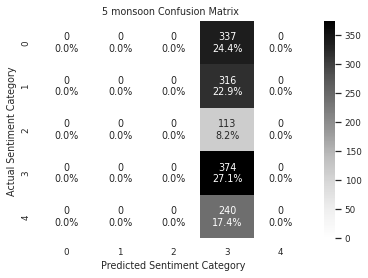

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_monsoon)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 monsoon Confusion Matrix  ');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('5 Confusion Matrix monsoon.png', bbox_inches = "tight")
plt.show()

In [39]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=200,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

In [40]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 33
	95percentile : 95
	99percentile : 140


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 32
	95percentile : 95
	99percentile : 135


In [41]:
model = trans.get_classifier()

In [42]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [43]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(5)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
920/920 [==============================] - 195s 191ms/step - loss: 1.5844 - accuracy: 0.2675
Epoch 2/10
920/920 [==============================] - 176s 192ms/step - loss: 1.5625 - accuracy: 0.2851
Epoch 3/10
920/920 [==============================] - 176s 192ms/step - loss: 1.5632 - accuracy: 0.2820
Epoch 4/10
920/920 [==============================] - 178s 193ms/step - loss: 1.5716 - accuracy: 0.2769
Epoch 5/10
920/920 [==============================] - 176s 192ms/step - loss: 1.5850 - accuracy: 0.2619
Epoch 6/10
920/920 [==============================] - 175s 190ms/step - loss: 1.6065 - accuracy: 0.2536
Epoch 7/10
920/920 [==============================] - 174s 190ms/step - loss: 6.0010 - accuracy: 0.2308
Epoch 8/10
920/920 [==============================] - 1s 1ms/step - loss: 7.0958 - accuracy: 0.3288


done.
Visually inspect loss plot and select learning rate associated with falling loss


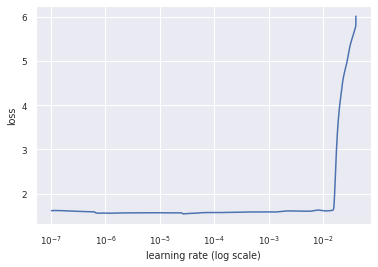

In [44]:
learner.lr_find(show_plot = True,max_epochs=10)

In [45]:
learner.fit_onecycle(1e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
921/921 [==============================] - 202s 201ms/step - loss: 1.6131 - accuracy: 0.2079 - val_loss: 1.6181 - val_accuracy: 0.1586
Epoch 2/10
921/921 [==============================] - 181s 197ms/step - loss: 1.6111 - accuracy: 0.2042 - val_loss: 1.6073 - val_accuracy: 0.2100
Epoch 3/10
921/921 [==============================] - 181s 196ms/step - loss: 1.5976 - accuracy: 0.2333 - val_loss: 1.6174 - val_accuracy: 0.2390
Epoch 4/10
921/921 [==============================] - 181s 196ms/step - loss: 1.5772 - accuracy: 0.2610 - val_loss: 1.5781 - val_accuracy: 0.2759
Epoch 5/10
921/921 [==============================] - 182s 198ms/step - loss: 1.5624 - accuracy: 0.2795 - val_loss: 1.6164 - val_accuracy: 0.2505
Epoch 6/10
921/921 [==============================] - 185s 201ms/step - loss: 1.5384 - accuracy: 0.3019 - val_loss: 1.6113 - val_accuracy: 0.2346
Epoch 7/10
921/921 [==============================] - 184s 19

In [46]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.28      0.23      0.25       309
           1       0.28      0.23      0.25       310
           2       0.10      0.16      0.13       153
           3       0.38      0.30      0.34       390
           4       0.26      0.38      0.31       219

    accuracy                           0.27      1381
   macro avg       0.26      0.26      0.26      1381
weighted avg       0.28      0.27      0.27      1381



array([[ 71,  50,  55,  65,  68],
       [ 64,  71,  55,  60,  60],
       [ 23,  28,  25,  32,  45],
       [ 68,  72,  70, 118,  62],
       [ 31,  33,  34,  37,  84]])

In [47]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [48]:
y_pred_mbert_cased = predictor.predict(x_test)
#print(y_pred)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_cased))

              precision    recall  f1-score   support

           0       0.27      0.21      0.24       337
           1       0.27      0.24      0.25       316
           2       0.12      0.23      0.16       113
           3       0.27      0.23      0.25       374
           4       0.33      0.41      0.36       240

    accuracy                           0.26      1380
   macro avg       0.25      0.26      0.25      1380
weighted avg       0.27      0.26      0.26      1380



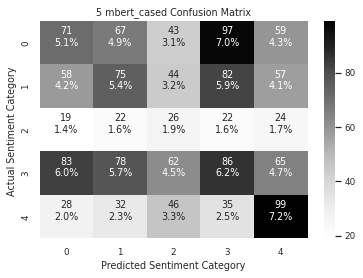

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_cased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 mbert_cased Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('5 mbert_cased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [51]:
import pandas as pd
sub_all=pd.DataFrame({'mbert_uncased':y_pred_mbert_uncased,'monsoon':y_pred_monsoon,'mbert_cased':y_pred_mbert_cased})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,mbert_uncased,monsoon,mbert_cased
0,2,3,1
1,2,3,0
2,2,3,1
3,2,3,0
4,2,3,2


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mode))

              precision    recall  f1-score   support

           0       0.27      0.21      0.24       337
           1       0.28      0.25      0.27       316
           2       0.09      0.43      0.16       113
           3       0.27      0.23      0.25       374
           4       0.00      0.00      0.00       240

    accuracy                           0.21      1380
   macro avg       0.18      0.23      0.18      1380
weighted avg       0.21      0.21      0.20      1380



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


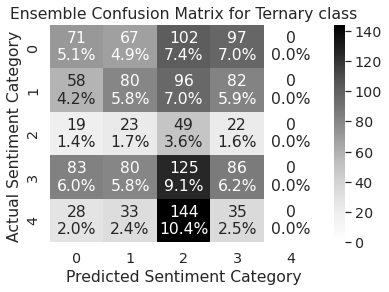

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_mode)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('Ensemble Confusion Matrix for Ternary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('5 Ensemble Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [59]:
df_result= sub_all
df_result['final prediction']= pred_mode
df_result['Actual Sentiment']= y_test
df_result['Text']=test['Text'].tolist()
df_result.to_csv('5 classes Ensemble Prediction results.csv', index=True)